# Pytorch Workflow

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


## Preparing and loading data

machine learning involves:

1. get data into a numerical representation
2. build a model to learn patterns in that numerical representation

In [ ]:
# create *known* parameters

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)

Y = weight * X + bias

## splitting data into training and test sets

In [ ]:
#create train/test split


train_split = int(0.8 * len(X))

X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

In [ ]:
#visualise

def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
    
    plt.figure(figsize=(10, 7))

    #plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

    #plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="test data")

    if predictions is not None:

        #plot predictions in red if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    #show the legend
    plt.legend(prop={"size": 14})

In [ ]:
plot_predictions()

## Build model

In [ ]:
# create linear regression model class

class LinearRegressionModel(nn.Module):     # almost all pytorch classes inherit from nn.module

    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True,
                                                dtype=torch.float32))
                                                
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float32))

    #forward method to define the computation in the model
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weights * X + self.bias

    

In [47]:
#create random seed
torch.manual_seed(5)

In [48]:
#instantiate model

model_0 = LinearRegressionModel()

In [ ]:
# see what the model contains
print(list(model_0.parameters()))
print(model_0.state_dict())

In [69]:
#make predictions with model
with torch.inference_mode():
    Y_pred = model_0(X_test)

Y_pred

tensor([[0.8599],
        [0.8739],
        [0.8879],
        [0.9019],
        [0.9159],
        [0.9299],
        [0.9439],
        [0.9579],
        [0.9719],
        [0.9859]])

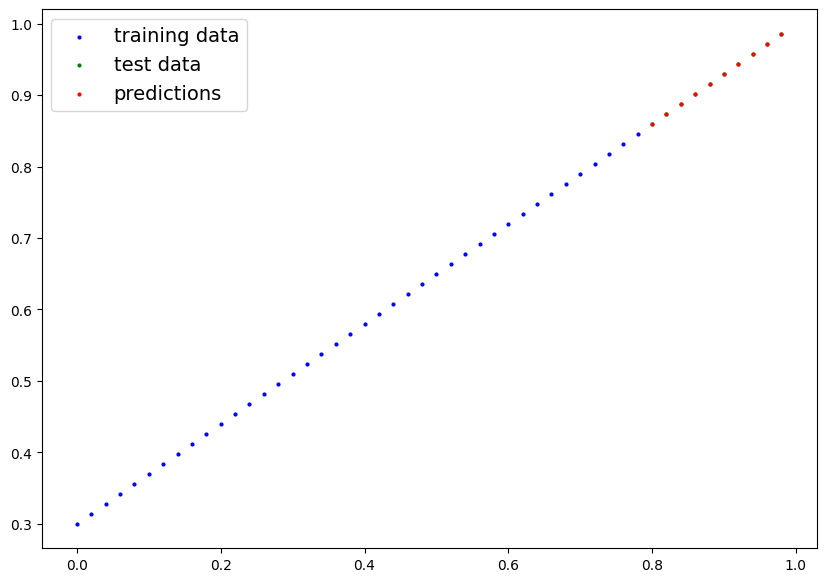

In [70]:
plot_predictions(predictions=Y_pred)

In [66]:
#setup loss func
loss_fn = nn.L1Loss()

#setup optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(model_0.parameters(), 
                            lr=0.0001)

In [67]:
#training loop
epochs = 1000

for epoch in range(epochs):

    model_0.train()

    Y_pred = model_0(X_train)
    
    loss = loss_fn(Y_pred, Y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

In [68]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.2999]))])